# Работа с графами в NetworkX

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/tutorial.html#creating-a-graph
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html
    * https://networkx.org/documentation/stable/reference/classes/index.html
    * https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html
    * https://networkx.org/documentation/stable/reference/readwrite/index.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_array.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.json_graph.node_link_data.html
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.graphml.write_graphml.html
* Датасеты с сетями:
    * http://networkrepository.com
    * http://konect.cc/networks/
    * https://snap.stanford.edu/data/
    * https://networkdata.ics.uci.edu/resources.php
    * https://kateto.net/2016/05/network-datasets/

## Вопросы для совместного обсуждения

1\. Обсудите основные возможности по созданию графов и работы с графами в NetworkX

2\. Обсудите работу с популярными форматами для хранения графов.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Напишите функцию, генерирующую кольцевой неориентированный граф из `n` узлов (`n` - параметр функции). Идентификатором узла выступают целые числа от 0 до `n-1`. Каждому узлу добавьте атрибут `age`, заполненный случайными целыми числами от 1 до 100. Каждому ребру добавьте атрибут `mean_incident_age`, состоящий из среднего значения атрибута `age` у узлов, инцидентных данному ребру. 

Создайте граф с `n=5` узлами. Выведите на экран __словари__, содержащие атрибут `age` для узлов (ключ - идентификатор узла) и `mean_incident_age` для ребер (ключ - пара `(u, v`) идентификаторов начала и конца ребра). Визуализируйте граф при помощи функции `nx.draw` (или `nx.draw_networkx`) с аргументами по умолчанию.

- [ ] Проверено на семинаре

In [ ]:
import networkx as nx
import numpy as np
from itertools import pairwise, product
import matplotlib.pyplot as plt

{'age': 48}
{'age': 88}
{'age': 72}
{'age': 96}
{'age': 12}
{'mean_incident_age': 68.0}
{'mean_incident_age': 30.0}
{'mean_incident_age': 80.0}
{'mean_incident_age': 84.0}
{'mean_incident_age': 54.0}


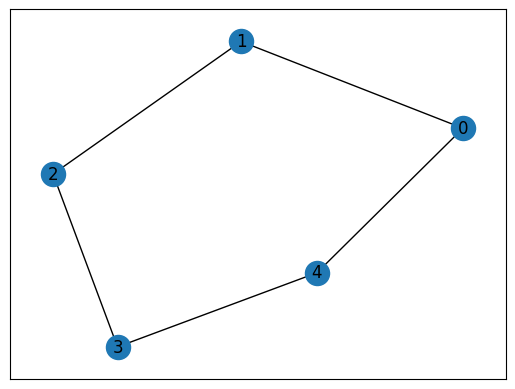

In [8]:

def gen_circle(n=5):
    G = nx.MultiGraph()
    
    for i in range(n):
        G.add_node(i, age=np.random.randint(1,100))
    
    for i in range(len(G.nodes)-1):
        G.add_edge(i,i+1, mean_incident_age=(G.nodes[i]["age"]+G.nodes[i+1]["age"])/2)
    G.add_edge(i+1,0, mean_incident_age=(G.nodes[0]["age"]+G.nodes[i+1]["age"])/2)

    
    nx.draw_networkx(G)
    
    return G
    
G = gen_circle(5)
for i in G.nodes:
    print(G.nodes[i])
    
for i in G.edges:
    print(G.edges[i])

<p class="task" id="2"></p>

2\. Напишите функцию, генерирующую ориентированный граф из `3n + 1` узлов (`n` - параметр функции), где центральный узел соединен с тремя путями длины `n`. Ребра всегда направлены в сторону удаления от центрального узла. 

Сгенерируйте граф для `n=3`. Выведите на экран количество узлов и ребер в графе. Для каждого узла выведите на экран список идентификаторов его соседей (отдельно по входящим и исходящим связям). Визуализируйте граф при помощи функции `nx.draw`  (или `nx.draw_networkx`) с аргументами по умолчанию. 

- [ ] Проверено на семинаре

Узел [входящие] [исходящие] 

0 [] [1, 2, 3]
1 [0] [4]
2 [0] [5]
3 [0] [6]
4 [1] [7]
7 [4] []
5 [2] [8]
8 [5] []
6 [3] [9]
9 [6] []


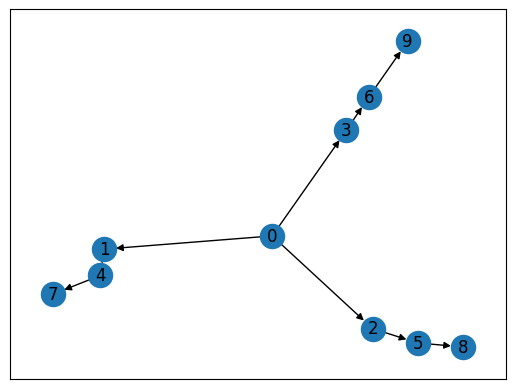

In [9]:
def gen_star(n=3):
    G = nx.MultiDiGraph()
    G.add_node(0)
    
    if n > 0:
        G.add_edges_from([[0,i] for i in range(1,4)])
    
    if n > 1:
        G.add_edges_from([[(i+1)+3*j, (i+1)+3*(j+1)] for i in range(3) for j in range(n-1)])
    
    nx.draw_networkx(G)
    return G

G = gen_star(3)

print('Узел [входящие] [исходящие] \n')
for i in G.nodes:
    print(i, list(map(lambda x: x[0], G.in_edges(i))), list(map(lambda x: x[1], G.out_edges(i))))

<p class="task" id="3"></p>

3\. Напишите собственную функцию создания двумерной решетки `n` на `m`. В качестве идентификаторов узлов используйте пары `(x, y)`, где `x` - номер строки решетки, `y` - номер столбца решетки. Сохраните ширину и высоту решетки в виде атрибутов `n` и `m ` самого графа. 

Сгенерируйте граф с n=5, m=4. Выведите на экран количество узлов и ребер в графе. Выведите созданные атрибуты графа на экран. Визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте и визуализируйте аналогичный по структуре граф при помощи готовой функции из `networkx`.

- [ ] Проверено на семинаре

Ребер 31
Узлов 20


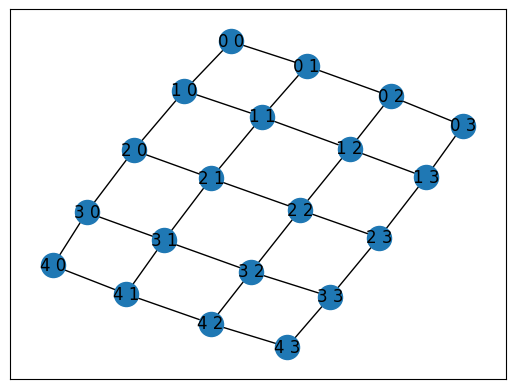

In [10]:
def reshetka(n,m):
    G = nx.MultiGraph(n=n,m=m)
    
    ans = []
    for i in range(n):
        ans.append([])
        for j in range(m):
            ans[i].append(f'{i} {j}')
    
    M = np.array(ans)
    for i in M:
        for n1,n2 in pairwise(i):
            G.add_edges_from([[str(n1),str(n2)]])
            
    for i in M.T:
        for n1,n2 in pairwise(i):
            G.add_edges_from([[str(n1),str(n2)]])
    
            
    

    nx.draw_networkx(G)
    return G
    
G = reshetka(5,4)

print(f'Ребер {len(G.edges)}')
print(f'Узлов {len(G.nodes)}')

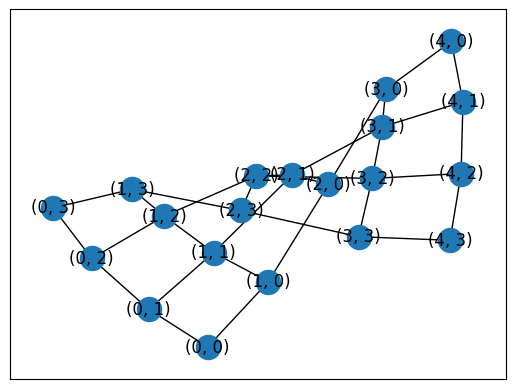

In [11]:
G = nx.grid_2d_graph(5,4)
nx.draw_networkx(G)

<p class="task" id="4"></p>

4\. Напишите функцию, которая генерирует мультиграф, состоящий из `m` узлов, где количество связей между узлами `u` и `v` сэмплится из биномиального распределения с параметрами `n` и `p` (`m`, `n`, `p` - параметры функции). Петли в графе допускаются. На каждом ребре создайте атрибут `weight`, равный обратному значению количества ребер между индицентными ему узлами. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Создайте версию графа с удаленными петлями и визуализуйте ее. 

- [ ] Проверено на семинаре

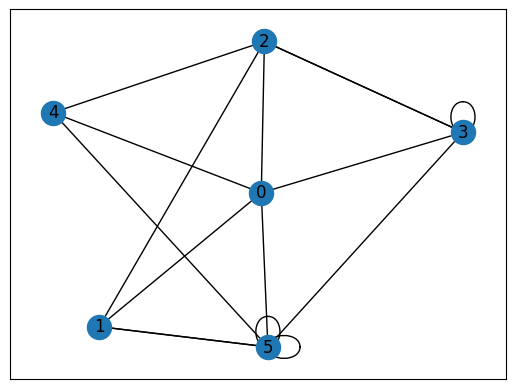

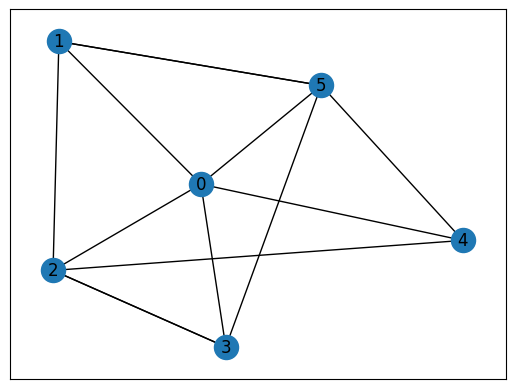

In [120]:
def gen_4(m, n, p):
    G = nx.MultiGraph()
    
    for u,v in product(range(m), range(m),):
        inv_weight = np.random.binomial(n,p)
        for edge in range(inv_weight):
            G.add_edge(u,v,weight=1/inv_weight)
            
    nx.draw_networkx(G)
    plt.show()
    
    
    new = G.copy()
    
    self_loops = list(nx.selfloop_edges(new))
    new.remove_edges_from(self_loops) 
    nx.draw_networkx(new)
    plt.show()

gen_4(6, 2,0.3)

<p class="task" id="5"></p>

5\. Граф «(u,v) цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длиной u и v соответственно (см.рис). Реализуйте функцию построения (1, 2) цветка. Функция принимает один целочисленный параметр `n` - количество шагов построения. Создайте и визуализируйте граф при помощи функции `nx.draw` с аргументами по умолчанию. Выведите на экран количество узлов и ребер графа на каждой из итераций.

![](https://i.imgur.com/aJnbzxM.png)

- [ ] Проверено на семинаре

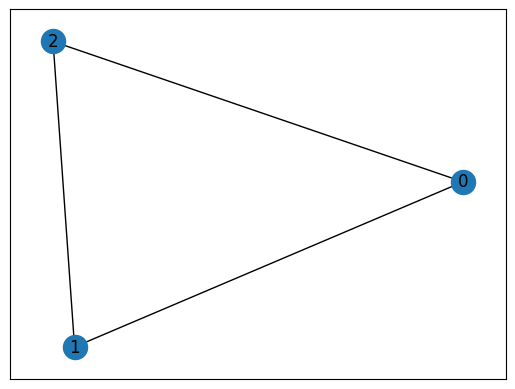

Количество узлов 3
Количество ребер 3


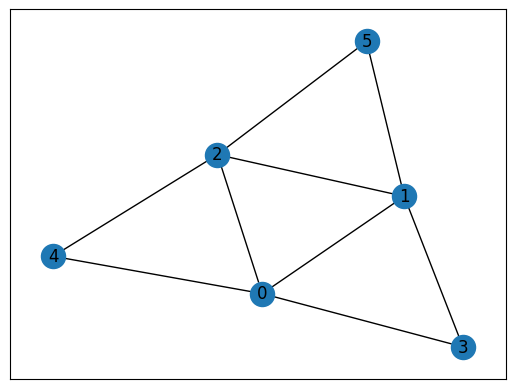

Количество узлов 6
Количество ребер 9


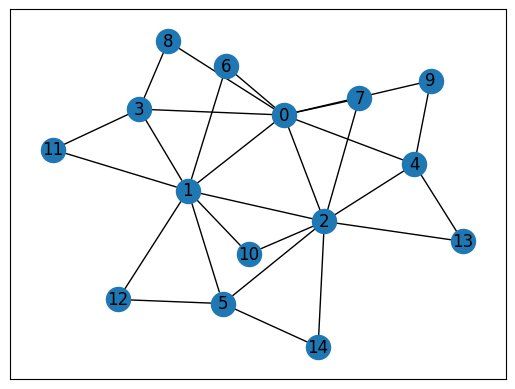

Количество узлов 15
Количество ребер 27


In [175]:
def gen_circle(n=5):
    G = nx.MultiGraph()
    
    for i in range(n):
        G.add_node(i)
    
    for i in range(len(G.nodes)-1):
        G.add_edge(i,i+1)
        
    if n > 2:
        G.add_edge(i+1,0)
    
    return G

def flower_1_2(n):    
    G = gen_circle(3)
    nx.draw_networkx(G)
    plt.show()
    print(f'Количество узлов {len(G.nodes)}')
    print(f'Количество ребер {len(G.edges)}')

    for i in range(n):
        
        new = G.copy()
        cur_edges = list(new.edges)
        # print(cur_edges)
        for u,v,_ in cur_edges: #+[cur_edges[0]]:
            new_node = len(new.nodes)
            new.add_edge(u,new_node)
            new.add_edge(new_node,v)
            # print(u,v)
        
        G = new
        nx.draw_networkx(G)
        plt.show()
        print(f'Количество узлов {len(G.nodes)}')
        print(f'Количество ребер {len(G.edges)}')
    return G
    
flower_1_2(2)

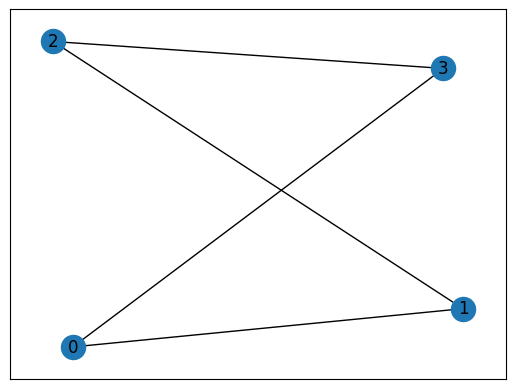

Количество узлов 4
Количество ребер 4


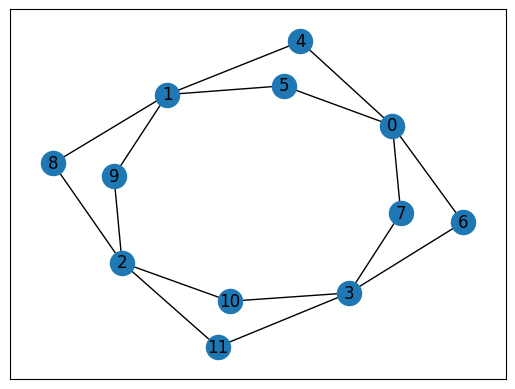

Количество узлов 12
Количество ребер 16


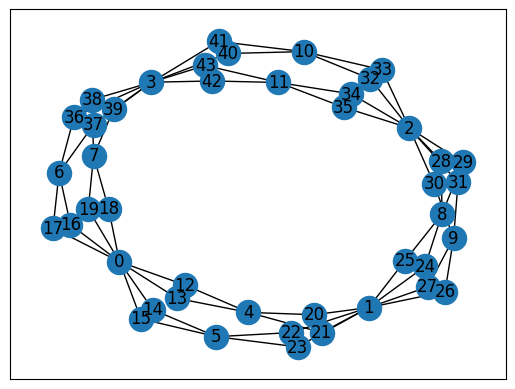

Количество узлов 44
Количество ребер 64


In [178]:
def flower_2_2(n):    
    G = gen_circle(4)
    nx.draw_networkx(G)
    plt.show()
    print(f'Количество узлов {len(G.nodes)}')
    print(f'Количество ребер {len(G.edges)}')
    for i in range(n):
        
        new = G.copy()
        cur_edges = list(new.edges)
        for u,v,_ in cur_edges:
            new_node = len(new.nodes)
            new.add_edge(u,new_node)
            new.add_edge(new_node,v)
            new_node = len(new.nodes)
            new.add_edge(u,new_node)
            new.add_edge(new_node,v)
            new.remove_edge(u,v)
        
        G = new
        nx.draw_networkx(G)
        plt.show()
        print(f'Количество узлов {len(G.nodes)}')
        print(f'Количество ребер {len(G.edges)}')
    return G
    
flower_2_2(2)

<p class="task" id="6"></p>

6\. Загрузите матрицу смежности графа из файла `weighted_wheel.npy` и создайте на ее основе граф.  Выведите на экран количество узлов и связей графа. Выведите на экран тип графа (nx.Graph, nx.DiGraph, ...). Выведите на экран словарь со значениями атрибута `weight` на ребрах.Сохраните граф на диск в формате edgelist.

- [ ] Проверено на семинареc

[[0 1 2 2 1 1 1 2 3 1]
 [1 0 1 0 0 0 0 0 0 2]
 [2 1 0 1 0 0 0 0 0 0]
 [2 0 1 0 2 0 0 0 0 0]
 [1 0 0 2 0 3 0 0 0 0]
 [1 0 0 0 3 0 0 0 0 0]
 [1 0 0 0 0 0 0 3 0 0]
 [2 0 0 0 0 0 3 0 2 0]
 [3 0 0 0 0 0 0 2 0 3]
 [1 2 0 0 0 0 0 0 3 0]]
Количество узлов 10
Количество ребер 17
<class 'networkx.classes.graph.Graph'>
(0, 1, {'weight': np.int32(1)})
(0, 2, {'weight': np.int32(2)})
(0, 3, {'weight': np.int32(2)})
(0, 4, {'weight': np.int32(1)})
(0, 5, {'weight': np.int32(1)})
(0, 6, {'weight': np.int32(1)})
(0, 7, {'weight': np.int32(2)})
(0, 8, {'weight': np.int32(3)})
(0, 9, {'weight': np.int32(1)})
(1, 2, {'weight': np.int32(1)})
(1, 9, {'weight': np.int32(2)})
(2, 3, {'weight': np.int32(1)})
(3, 4, {'weight': np.int32(2)})
(4, 5, {'weight': np.int32(3)})
(6, 7, {'weight': np.int32(3)})
(7, 8, {'weight': np.int32(2)})
(8, 9, {'weight': np.int32(3)})


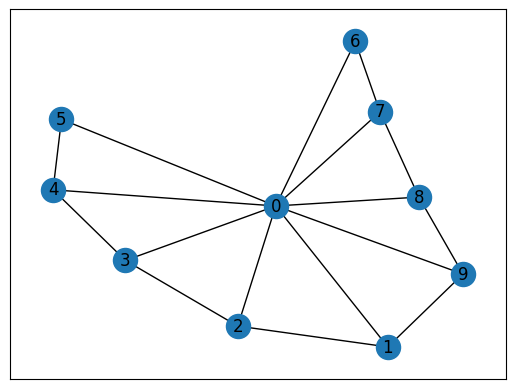

In [26]:
smezh = np.load("data/weighted_wheel.npy")
print(smezh)

G = nx.Graph()
rows, cols = smezh.shape
for i in range(rows):
    G.add_node(i)
    for j in range(i, cols):
        weight = smezh[i, j]
        if weight > 0:
            G.add_edge(i, j, weight=weight)
                
nx.draw_networkx(G)

print(f'Количество узлов {G.number_of_nodes()}')
print(f'Количество ребер {G.number_of_edges()}')
print(f'{type(G)}')
nx.write_edgelist(G, 'data/task6.edgelist')

print(*G.edges(data=True), sep='\n')

<p class="task" id="7"></p>

7\. Загрузите информацию о ребрах графа из файла `data/karate.edgelist` и создайте на ее основе граф при помощи функции `read_edgelist`. При создании графа приведите идентификаторы узлов к числовому типу. Выведите на экран количество узлов и ребер загруженного графа, выведите на экран список узлов графа. Загрузите граф карате-клуба при помощи функции `nx.karate_club_graph`. Сравните две матрицы смежности (загруженного из файла графа и графа, созданного функцией) и покажите, что они одинаковые. При создании матриц смежности учтите, что порядок следования узлов в графах может различаться.  

- [ ] Проверено на семинаре

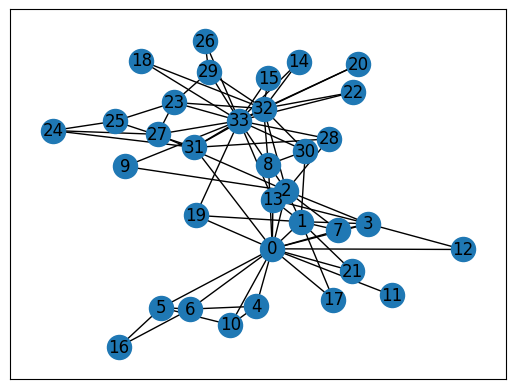

Количество узлов 34
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 14, 15, 18, 20, 22, 23, 25, 29, 24, 26]
Количество ребер 78


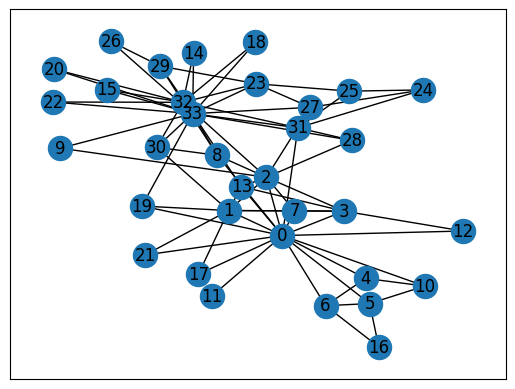

True


In [59]:
G = nx.read_edgelist('data/karate.edgelist',delimiter='/',nodetype=int)
nx.draw_networkx(G)
plt.show()

print(f'Количество узлов {G.number_of_nodes()}')
print(list(G.nodes()))
print(f'Количество ребер {G.number_of_edges()}')

karate_graph = nx.karate_club_graph()
nx.draw_networkx(karate_graph)
plt.show()

nodes_G = sorted(G.nodes())
nodes_karate = sorted(karate_graph.nodes())

adj_G = nx.adjacency_matrix(G, nodelist=nodes_G).toarray()
adj_karate = nx.adjacency_matrix(karate_graph, nodelist=nodes_karate).toarray()
print(np.array_equal(adj_G, adj_karate))